<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working in IBM Cloud Watson Studio, please replace the command for installing nbformat from `!pip install nbformat==4.2.0` to simply `!pip install nbformat`


In [19]:
!pip install yfinance==0.1.67
!mamba install bs4==4.10.0 -y
!pip install nbformat==4.2.0
!pip install nbformat==4.2.0
!pip install html5lib


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.4.2) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['bs4==4.10.0']

[+] 0.0s
[+] 0.1s
pkgs/main/linux-64 ━━━━━━╸━━━━━━━━━━━━━━━╸━━   0.0 B /  ??.?MB @ 

In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [20]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In this section, we define the function `make_graph`. You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.


In [21]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [5]:
ticker_symbol = "TSLA"
tesla_stock = yf.Ticker(ticker_symbol)

# Get historical stock data
historical_data = tesla_stock.history(period="1d", start="2023-01-01", end="2023-12-31")

# Print the historical data
print(historical_data)

                  Open        High         Low       Close     Volume  \
Date                                                                    
2023-01-03  118.470001  118.800003  104.639999  108.099998  231402800   
2023-01-04  109.110001  114.589996  107.519997  113.639999  180389000   
2023-01-05  110.510002  111.750000  107.160004  110.339996  157986300   
2023-01-06  103.000000  114.389999  101.809998  113.059998  220911100   
2023-01-09  118.959999  123.519997  117.110001  119.769997  190284000   
...                ...         ...         ...         ...        ...   
2023-12-22  256.760010  258.220001  251.369995  252.539993   93249800   
2023-12-26  254.490005  257.970001  252.910004  256.609985   86892400   
2023-12-27  258.350006  263.339996  257.519989  261.440002  106494400   
2023-12-28  263.660004  265.130005  252.710007  253.179993  113619900   
2023-12-29  255.100006  255.190002  247.429993  248.479996  100615300   

            Dividends  Stock Splits  
Date        

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [6]:
tesla_data = tesla_stock.history(period="max")

# Print the first few rows of the dataframe
print(tesla_data.head())

# Optionally, you can save the dataframe to a CSV file
tesla_data.to_csv('tesla_stock_data.csv')

                Open      High       Low     Close     Volume  Dividends  \
Date                                                                       
2010-06-29  1.266667  1.666667  1.169333  1.592667  281494500          0   
2010-06-30  1.719333  2.028000  1.553333  1.588667  257806500          0   
2010-07-01  1.666667  1.728000  1.351333  1.464000  123282000          0   
2010-07-02  1.533333  1.540000  1.247333  1.280000   77097000          0   
2010-07-06  1.333333  1.333333  1.055333  1.074000  103003500          0   

            Stock Splits  
Date                      
2010-06-29           0.0  
2010-06-30           0.0  
2010-07-01           0.0  
2010-07-02           0.0  
2010-07-06           0.0  


**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [7]:
tesla_data.reset_index(inplace=True)

# Display the first five rows of the tesla_data dataframe
print(tesla_data.head())

        Date      Open      High       Low     Close     Volume  Dividends  \
0 2010-06-29  1.266667  1.666667  1.169333  1.592667  281494500          0   
1 2010-06-30  1.719333  2.028000  1.553333  1.588667  257806500          0   
2 2010-07-01  1.666667  1.728000  1.351333  1.464000  123282000          0   
3 2010-07-02  1.533333  1.540000  1.247333  1.280000   77097000          0   
4 2010-07-06  1.333333  1.333333  1.055333  1.074000  103003500          0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [9]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"


response = requests.get(url)

if response.status_code == 200:
    # Save the text of the response as html_data
    html_data = response.text
    print("Webpage successfully downloaded.")
else:
    print(f"Error: Unable to download webpage. Status code: {response.status_code}")
    

Webpage successfully downloaded.


Parse the html data using `beautiful_soup`.


In [17]:
soup = BeautifulSoup(html_data, 'html.parser')


title = soup.title
print("Title of the webpage:", title.text)

Title of the webpage: Tesla Revenue 2010-2022 | TSLA | MacroTrends


Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [23]:
table = soup.find_all("tbody")[1]

# Extract rows from the table
rows = table.find_all('tr')

# Initialize empty lists to store data
data = {
    'Date': [],
    'Revenue': []
}

# Loop through rows and columns to extract data
for row in rows:
    columns = row.find_all('td')
    
    # Ensure there are two columns (Date and Revenue)
    if len(columns) == 2:
        date, revenue = columns
        data['Date'].append(date.get_text(strip=True))
        data['Revenue'].append(revenue.get_text(strip=True))

# Create a DataFrame from the extracted data
tesla_revenue = pd.DataFrame(data)

# Display the dataframe
print(tesla_revenue.head())

         Date  Revenue
0  2022-09-30  $21,454
1  2022-06-30  $16,934
2  2022-03-31  $18,756
3  2021-12-31  $17,719
4  2021-09-30  $13,757


Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


In [24]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

Execute the following lines to remove an null or empty strings in the Revenue column.


In [25]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [26]:
tesla_revenue.tail

<bound method NDFrame.tail of           Date Revenue
0   2022-09-30   21454
1   2022-06-30   16934
2   2022-03-31   18756
3   2021-12-31   17719
4   2021-09-30   13757
5   2021-06-30   11958
6   2021-03-31   10389
7   2020-12-31   10744
8   2020-09-30    8771
9   2020-06-30    6036
10  2020-03-31    5985
11  2019-12-31    7384
12  2019-09-30    6303
13  2019-06-30    6350
14  2019-03-31    4541
15  2018-12-31    7226
16  2018-09-30    6824
17  2018-06-30    4002
18  2018-03-31    3409
19  2017-12-31    3288
20  2017-09-30    2985
21  2017-06-30    2790
22  2017-03-31    2696
23  2016-12-31    2285
24  2016-09-30    2298
25  2016-06-30    1270
26  2016-03-31    1147
27  2015-12-31    1214
28  2015-09-30     937
29  2015-06-30     955
30  2015-03-31     940
31  2014-12-31     957
32  2014-09-30     852
33  2014-06-30     769
34  2014-03-31     621
35  2013-12-31     615
36  2013-09-30     431
37  2013-06-30     405
38  2013-03-31     562
39  2012-12-31     306
40  2012-09-30      50
41  

## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [27]:
ticker_symbol_gme = "GME"
gme_stock = yf.Ticker(ticker_symbol_gme)

# Now you can use the gme_stock object to retrieve various information about GameStop
# For example, you can get historical stock data:
historical_data_gme = gme_stock.history(period="1d", start="2023-01-01", end="2023-12-31")

# Print the historical data
print(historical_data_gme)

                 Open       High        Low      Close   Volume  Dividends  \
Date                                                                         
2023-01-03  18.639999  19.260000  17.090000  17.200001  5135200          0   
2023-01-04  17.250000  17.930000  16.900000  17.320000  3939300          0   
2023-01-05  17.059999  17.260000  15.890000  16.219999  6066200          0   
2023-01-06  16.000000  16.570000  15.410000  16.459999  4823400          0   
2023-01-09  16.650000  17.129999  16.360001  16.379999  3522600          0   
...               ...        ...        ...        ...      ...        ...   
2023-12-22  16.780001  17.200001  16.450001  16.969999  3325100          0   
2023-12-26  16.980000  17.410000  16.820000  17.360001  3079600          0   
2023-12-27  17.430000  18.370001  17.370001  18.370001  4800100          0   
2023-12-28  18.049999  18.320000  17.850000  18.070000  3574800          0   
2023-12-29  18.040001  18.160000  17.459999  17.530001  4524200 

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [28]:
gme_data = gme_stock.history(period="max")

# Print the first few rows of the dataframe
print(gme_data.head())

# Optionally, you can save the dataframe to a CSV file
gme_data.to_csv('gme_stock_data.csv')

                Open      High       Low     Close    Volume  Dividends  \
Date                                                                      
2002-02-13  1.620129  1.693350  1.603296  1.691667  76216000        0.0   
2002-02-14  1.712707  1.716074  1.670626  1.683250  11021600        0.0   
2002-02-15  1.683250  1.687458  1.658001  1.674834   8389600        0.0   
2002-02-19  1.666418  1.666418  1.578047  1.607504   7410400        0.0   
2002-02-20  1.615920  1.662210  1.603296  1.662210   6892800        0.0   

            Stock Splits  
Date                      
2002-02-13           0.0  
2002-02-14           0.0  
2002-02-15           0.0  
2002-02-19           0.0  
2002-02-20           0.0  


**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [29]:
gme_data.reset_index(inplace=True)
gme_data.head

<bound method NDFrame.head of            Date       Open       High        Low      Close    Volume  \
0    2002-02-13   1.620129   1.693350   1.603296   1.691667  76216000   
1    2002-02-14   1.712707   1.716074   1.670626   1.683250  11021600   
2    2002-02-15   1.683250   1.687458   1.658001   1.674834   8389600   
3    2002-02-19   1.666418   1.666418   1.578047   1.607504   7410400   
4    2002-02-20   1.615920   1.662210   1.603296   1.662210   6892800   
...         ...        ...        ...        ...        ...       ...   
5506 2023-12-28  18.049999  18.320000  17.850000  18.070000   3574800   
5507 2023-12-29  18.040001  18.160000  17.459999  17.530001   4524200   
5508 2024-01-02  17.250000  17.600000  16.580000  16.670000   4428000   
5509 2024-01-03  16.299999  16.830000  15.900000  16.690001   4193600   
5510 2024-01-04  16.510000  16.750000  16.309999  16.360001   2667500   

      Dividends  Stock Splits  
0           0.0           0.0  
1           0.0           0.0

## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data`.


In [30]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Save the text of the response as html_data
    html_data = response.text
    print("Webpage successfully downloaded.")
else:
    print(f"Error: Unable to download webpage. Status code: {response.status_code}")

Webpage successfully downloaded.


Parse the html data using `beautiful_soup`.


In [31]:
soup = BeautifulSoup(html_data, 'html.parser')


title = soup.title
print("Title of the webpage:", title.text)

Title of the webpage: GameStop Revenue 2006-2020 | GME | MacroTrends


Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column using a method similar to what you did in Question 2.


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [32]:
from bs4 import BeautifulSoup
import pandas as pd
soup = BeautifulSoup(html_data, 'html.parser')


table = soup.find_all("table")[1]  # Assuming the table is at index 1


rows = table.find_all('tr')

data = {
    'Date': [],
    'Revenue': []
}

for row in rows[1:]:  # Start from index 1 to skip header row
    columns = row.find_all('td')
    
   
    if len(columns) == 2:
        date, revenue = columns
        data['Date'].append(date.get_text(strip=True))
        
       
        revenue_value = revenue.get_text(strip=True).replace(',', '').replace('$', '')
        data['Revenue'].append(revenue_value)

gme_revenue = pd.DataFrame(data)


print(gme_revenue.head())


         Date Revenue
0  2020-04-30    1021
1  2020-01-31    2194
2  2019-10-31    1439
3  2019-07-31    1286
4  2019-04-30    1548


Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [33]:
gme_revenue.tail

<bound method NDFrame.tail of           Date Revenue
0   2020-04-30    1021
1   2020-01-31    2194
2   2019-10-31    1439
3   2019-07-31    1286
4   2019-04-30    1548
..         ...     ...
57  2006-01-31    1667
58  2005-10-31     534
59  2005-07-31     416
60  2005-04-30     475
61  2005-01-31     709

[62 rows x 2 columns]>

## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`. Note the graph will only show data upto June 2021.


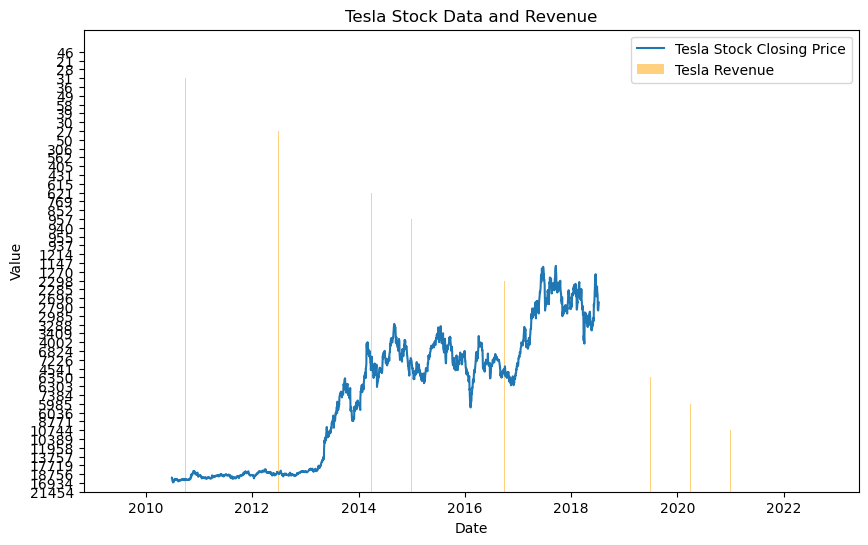

In [36]:
import matplotlib.pyplot as plt
def make_graph(stock_data, revenue_data, stock_name):
  
    plt.figure(figsize=(10, 6))
    plt.plot(stock_data['Date'], stock_data['Close'], label=f'{stock_name} Stock Closing Price')
    
    plt.bar(revenue_data['Date'], revenue_data['Revenue'], alpha=0.5, color='orange', label=f'{stock_name} Revenue')

    plt.title(f'{stock_name} Stock Data and Revenue')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

make_graph(tesla_data.loc[:'2021-06-30'], tesla_revenue, 'Tesla')

## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


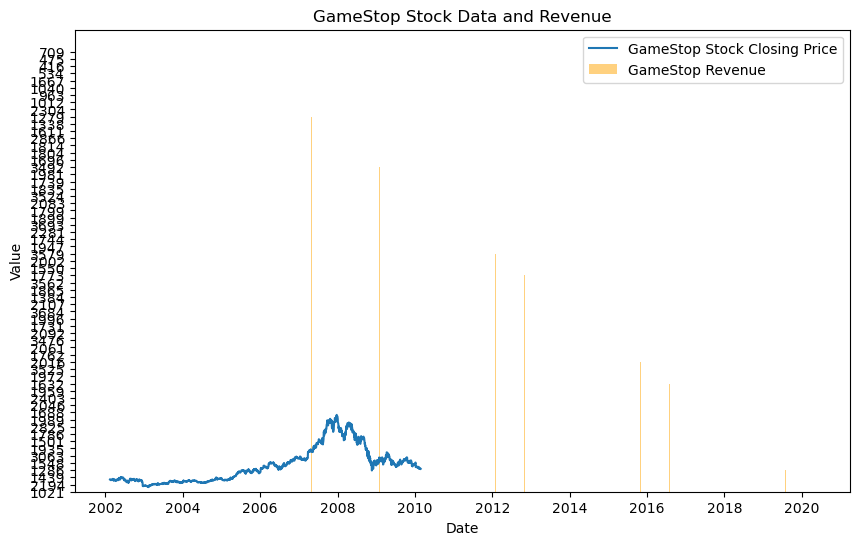

In [37]:
def make_graph(stock_data, revenue_data, stock_name):

    plt.figure(figsize=(10, 6))
    plt.plot(stock_data['Date'], stock_data['Close'], label=f'{stock_name} Stock Closing Price')
    plt.bar(revenue_data['Date'], revenue_data['Revenue'], alpha=0.5, color='orange', label=f'{stock_name} Revenue')

    plt.title(f'{stock_name} Stock Data and Revenue')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

make_graph(gme_data.loc[:'2021-06-30'], gme_revenue, 'GameStop')

<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
